In [6]:
import pandas as pd

# 读取CSV文件
file_path = 'data/overall/btc (1).csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 为数据集添加列名
columns = ['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 
           'QuoteAssetVolume', 'NumberOfTrades', 'TakerBuyBaseAssetVolume', 
           'TakerBuyQuoteAssetVolume', 'Ignore']
df.columns = columns

# 计算涨幅百分比
df['Change'] = ((df['Close'] - df['Open']) / df['Open']) * 100

# 计算HighChange
df['HighChange'] = ((df['High'] - df['Close']) / df['Close']) * 100

# 计算LowChange
df['LowChange'] = ((df['Low'] - df['Close']) / df['Close']) * 100

# 计算VolChange
df['VolumeChange'] = df['Volume'].diff()
df.loc[df.index[0], 'VolumeChange'] = 0

# 计算这些差异的百分比，并在Volume为0时将VolChange设置为0
# 先计算差异的百分比
df['VolChange'] = ((df['VolumeChange'] / df['Volume'].shift(1)) * 100)
# 将Volume为0的行的VolChange设置为0
df.loc[df['Volume'].shift(1) == 0, 'VolChange'] = 0
# 替换任何NaN值为0
df['VolChange'] = df['VolChange'].fillna(0)

df = df.iloc[1:]

# 保存到新的CSV文件（如果需要）
output_file_path = 'Processed_Data/overall/BTC.csv'  # 替换为你要保存的文件路径
df.to_csv(output_file_path, index=False)



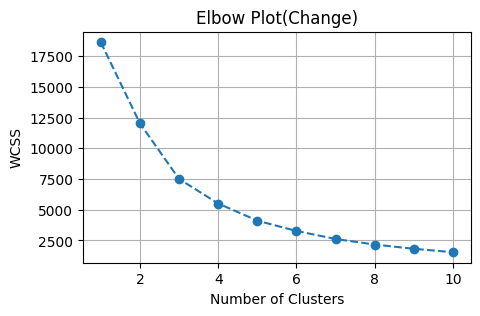

                min        max
cluster1                      
0         -0.675891   0.580715
1          0.580845  17.367225
2        -18.220147  -0.676037


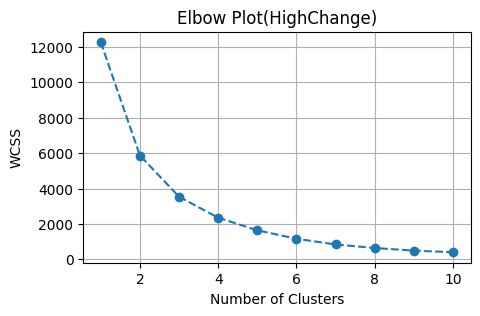

               min        max
cluster2                     
0         0.000000   0.708314
1         0.708734   2.383526
2         2.385472  22.479675


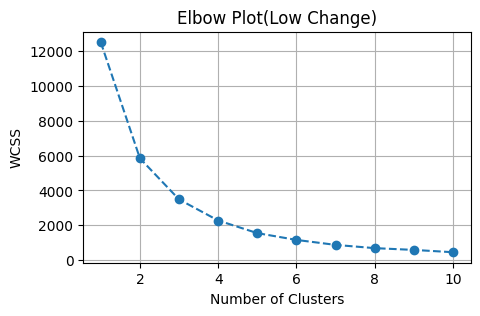

                min       max
cluster3                     
0        -21.997191 -2.083309
1         -0.667095  0.000000
2         -2.080764 -0.667245


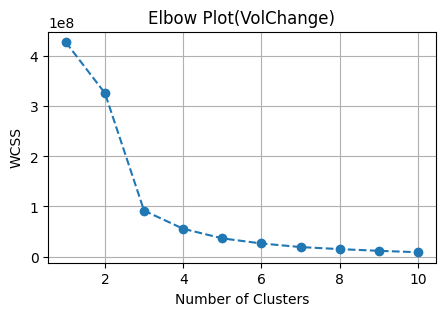

                   min           max
cluster4                            
0          -100.000000     98.856195
1         15530.844344  15530.844344
2            98.940148   2454.939637


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'Processed_Data/overall/BTC.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

df = df.iloc[3:]

# 'Change', 'HighChange', 'LowChange', 'VolChange'

# 使用KMeans的肘部法则来确定最佳的簇数
wcss1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['Change']])
    wcss1.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Curve Plot(Change)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 3  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster1'] = kmeans.fit_predict(df[['Change']])

# 找到每个簇的涨幅范围
cluster_ranges1 = df.groupby('cluster1')['Change'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges1)

# 使用KMeans的肘部法则来确定最佳的簇数
wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['HighChange']])
    wcss2.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Curve Plot(HighChange)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 3  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster2'] = kmeans.fit_predict(df[['HighChange']])

# 找到每个簇的涨幅范围
cluster_ranges2 = df.groupby('cluster2')['HighChange'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges2)

# 使用KMeans的肘部法则来确定最佳的簇数
wcss3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['LowChange']])
    wcss3.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Curve Plot(Low Change)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 3  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster3'] = kmeans.fit_predict(df[['LowChange']])

# 找到每个簇的涨幅范围
cluster_ranges3 = df.groupby('cluster3')['LowChange'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges3)

# 使用KMeans的肘部法则来确定最佳的簇数
wcss4 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[['VolChange']])
    wcss4.append(kmeans.inertia_)


# 绘制肘部图表
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss4, marker='o', linestyle='--')
plt.title('Elbow Curve Plot(VolChange)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 根据肘部图表选择最佳的簇数，然后进行聚类
optimal_clusters = 3  # 假设我们通过肘部图表决定最佳的簇数是3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster4'] = kmeans.fit_predict(df[['VolChange']])

# 找到每个簇的涨幅范围
cluster_ranges4 = df.groupby('cluster4')['VolChange'].agg(['min', 'max'])

# 打印每个簇的涨幅范围
print(cluster_ranges4)

# 保存到新的CSV文件（如果需要）
output_file_path = 'Processed_Data/overall/BTC_clustered.csv'  # 替换为你要保存的文件路径
df.to_csv(output_file_path, index=False)


In [19]:
import pandas as pd

# 读取CSV文件
file_path = 'Processed_Data/overall/BTC_clustered.csv'  # 替换为你的CSV文件路径
df = pd.read_csv(file_path)

# 创建一个映射字典
recode_dict1 = {1: 'high', 0: 'normal', 2: 'low'}
recode_dict2 = {2: 'high', 1: 'normal', 0: 'low'}
recode_dict3 = {0: 'high', 2: 'normal', 1: 'low'}
recode_dict4 = {1: 'high', 2: 'normal', 0: 'low'}

# 应用映射到每一列
df['cluster1'] = df['cluster1'].apply(lambda x: recode_dict1[x] if x in recode_dict1 else x)
df['cluster2'] = df['cluster2'].apply(lambda x: recode_dict2[x] if x in recode_dict2 else x)
df['cluster3'] = df['cluster3'].apply(lambda x: recode_dict3[x] if x in recode_dict3 else x)
df['cluster4'] = df['cluster4'].apply(lambda x: recode_dict4[x] if x in recode_dict4 else x)


#重命名新创建的列
df.rename(columns={'cluster1': 'changecluster', 'cluster2': 'highcluster', 'cluster3': 'lowcluster', 'cluster4': 'volcluster'}, inplace=True)

# 更新CSV文件
output_file_path = 'Processed_Data/overall/BTC_clustered.csv'  
df.to_csv(output_file_path, index=False)
